<a href="https://colab.research.google.com/github/Msibdoo/Amazon-Web-Scrapping-Project./blob/main/Amazon_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# Set random seeds for reproducibility
import random
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Install openpyxl if needed
!pip install openpyxl

# Step 3: Read the uploaded file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel("Amazon_data.xlsx")

# Display the first few rows of the DataFrame
print(df.head(20))


Saving Amazon_data.xlsx to Amazon_data.xlsx
         Date       Open       High        Low      Close  Adj Close  \
0  2019-01-02  73.260002  77.667999  73.046501  76.956497  76.956497   
1  2019-01-03  76.000504  76.900002  74.855499  75.014000  75.014000   
2  2019-01-04  76.500000  79.699997  75.915497  78.769501  78.769501   
3  2019-01-07  80.115501  81.727997  79.459503  81.475502  81.475502   
4  2019-01-08  83.234497  83.830498  80.830498  82.829002  82.829002   
5  2019-01-09  82.649002  83.389999  82.070000  82.971001  82.971001   
6  2019-01-10  82.050499  83.162498  81.081001  82.810997  82.810997   
7  2019-01-11  82.027496  83.014503  81.810997  82.028000  82.028000   
8  2019-01-14  80.750000  82.410004  79.757500  80.860497  80.860497   
9  2019-01-15  81.599998  83.758003  81.300499  83.727997  83.727997   
10 2019-01-16  84.210999  85.250000  83.793999  84.189003  84.189003   
11 2019-01-17  84.000000  85.008499  83.875000  84.661003  84.661003   
12 2019-01-18  85.59

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1363,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1.363000e+03
mean,2021-09-15 02:03:36.581071104,131.207489,132.779057,129.540897,131.183755,131.183755,7.324577e+07
min,2019-01-02 00:00:00,73.260002,76.900002,73.046501,75.014000,75.014000,1.762600e+07
25%,2020-05-09 12:00:00,96.756752,97.820751,95.512501,96.977497,96.977497,5.119100e+07
50%,2021-09-15 00:00:00,132.250000,133.570007,130.580002,132.210007,132.210007,6.408600e+07
75%,2023-01-23 12:00:00,160.688247,162.506744,158.951996,161.027000,161.027000,8.645300e+07
max,2024-05-31 00:00:00,189.160004,191.699997,187.440002,189.500000,189.500000,3.113460e+08
std,NaN,32.624822,32.889596,32.269655,32.539861,32.539861,3.361647e+07


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)


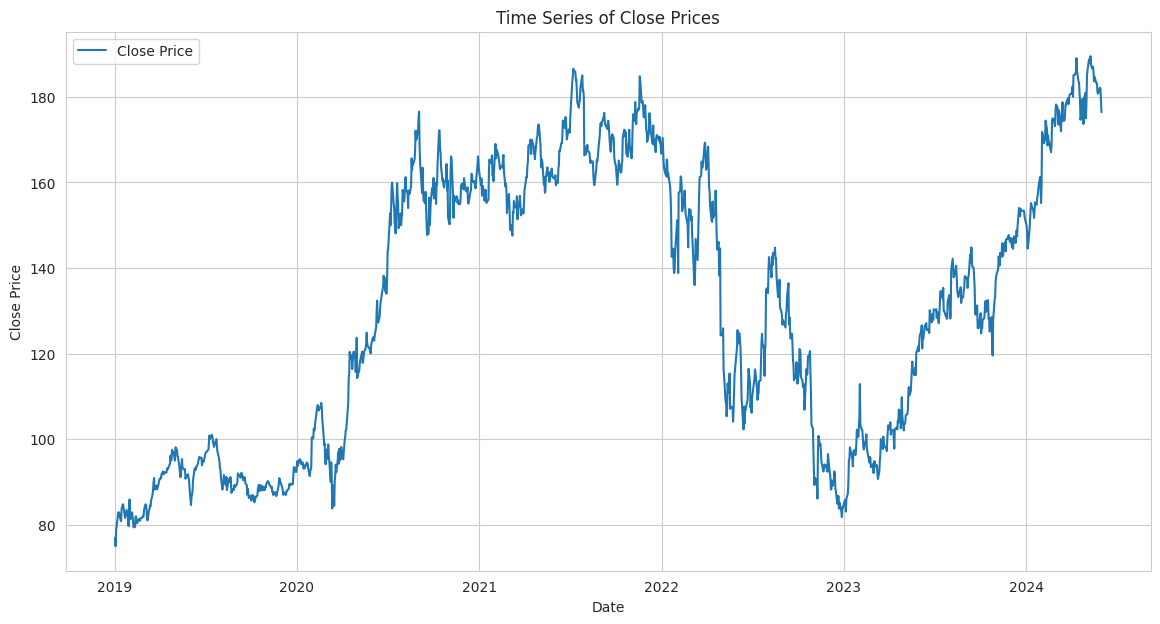

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Plotting the original data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
save_path = 'Time_Series_Plot.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

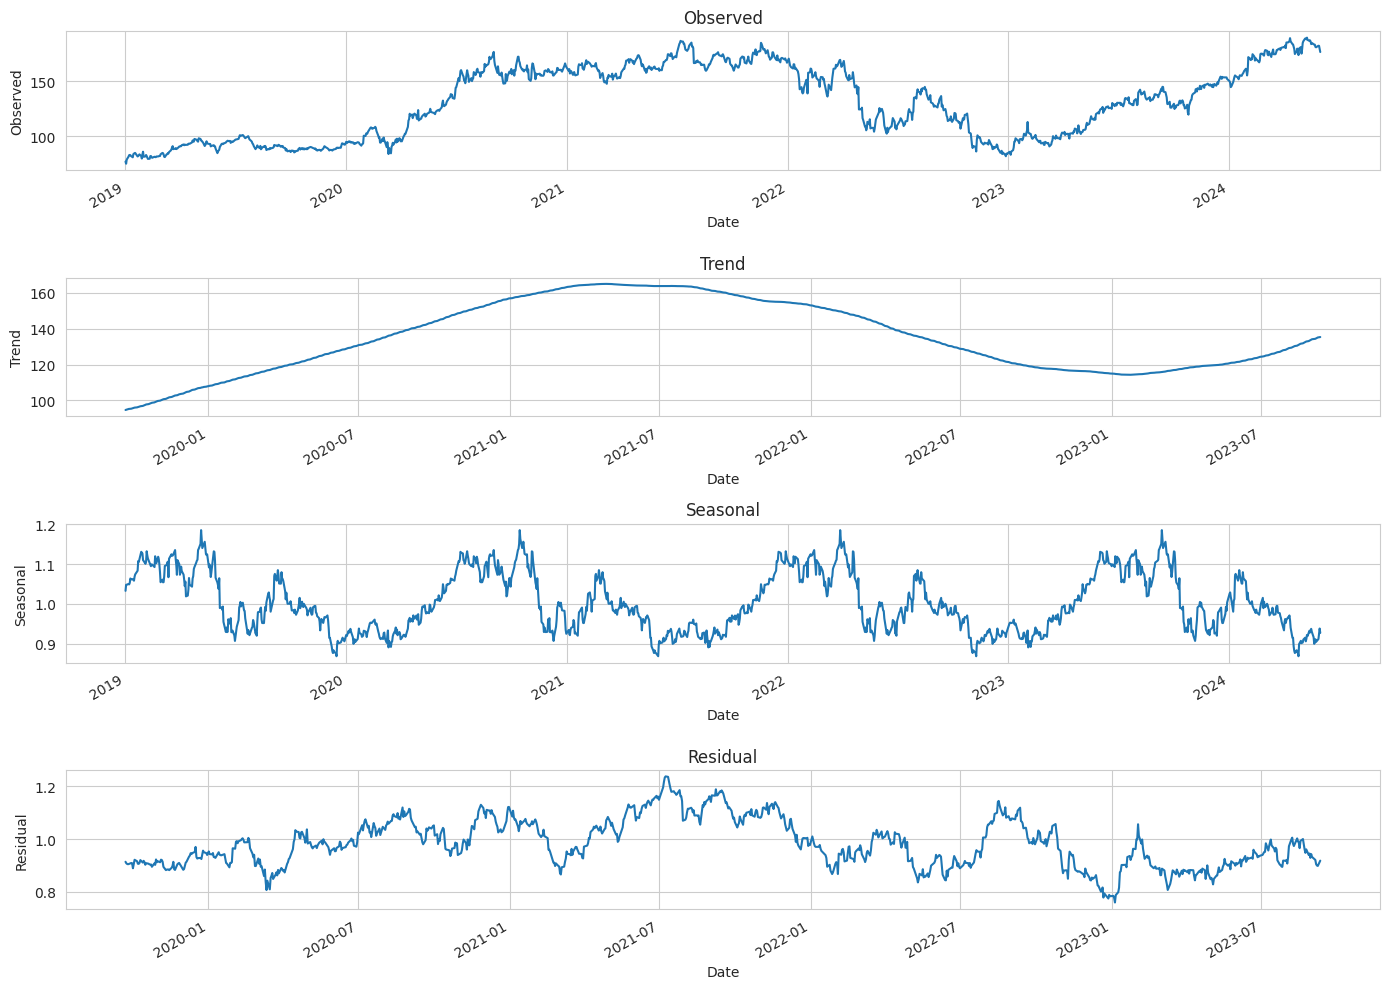

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert the 'Date' column to datetime format if it's not already
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the 'Date' column as the index of the DataFrame
    df.set_index('Date', inplace=True)

# Seasonal decomposition of the time series
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax2.set_title('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_title('Residual')

plt.tight_layout()
save_path = 'Seasonal_Decomposition.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)


In [ ]:
# Detecting outliers in the residual component
residual = decomposition.resid.dropna()
outlier_threshold = 3
outliers = residual[(np.abs(residual - residual.mean()) > outlier_threshold * residual.std())]

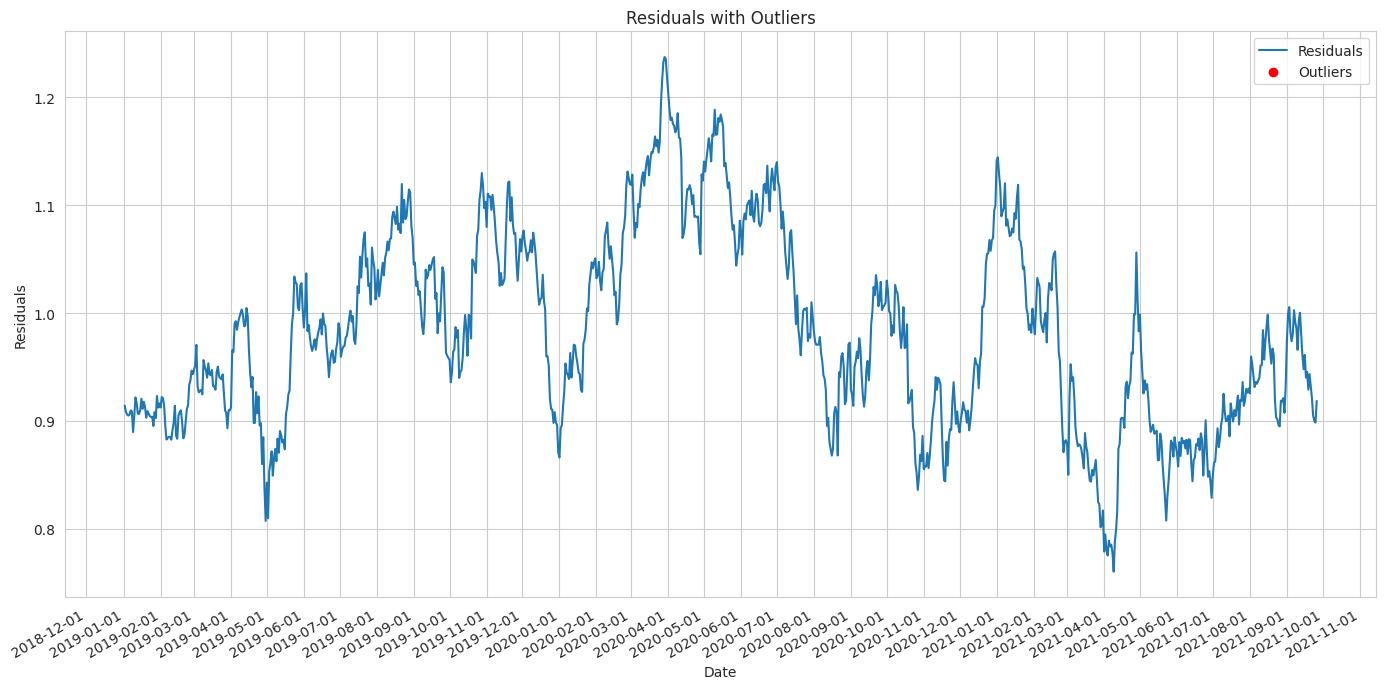

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: create a DateTimeIndex (replace with your actual dates)
dates = pd.date_range(start='2019-01-02', periods=len(residual), freq='D') # Changed 'residuals' to 'residual'

# Reindex residuals with the DateTimeIndex
residual.index = dates # Changed 'residuals' to 'residual'

# Example for outliers: create a DateTimeIndex (adjust as needed)
# Assuming outliers have corresponding dates in the same format
# outliers_dates = pd.to_datetime(['2023-01-05', '2023-01-15']) # Example dates
# outliers = pd.Series([1.2, 2.3], index=outliers_dates)

# Plotting residuals and outliers
plt.figure(figsize=(14, 7))

# Plot residuals
plt.plot(residual.index, residual, label='Residuals') # Changed 'residuals' to 'residual'

# Plot outliers (assuming outliers are also indexed with dates)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')

# Formatting the plot
plt.title('Residuals with Outliers')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Save and show plot
save_path = 'Residuals_with_Outliers.png'
plt.tight_layout()
plt.savefig(save_path)
plt.show()

files.download(save_path)

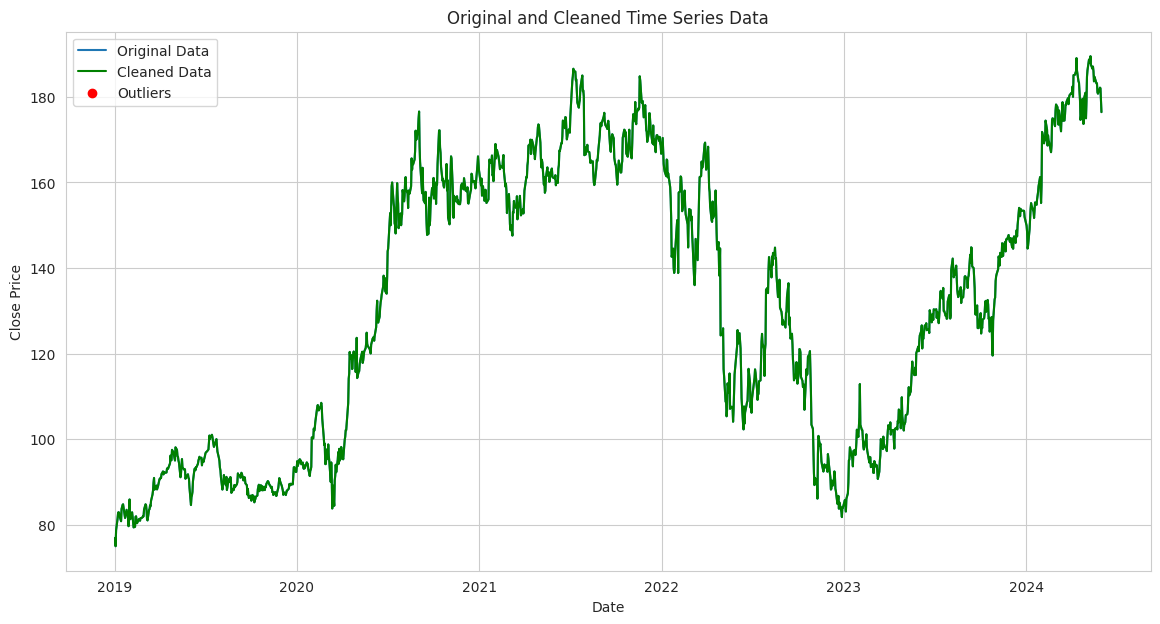

Number of outliers detected and removed: 0
Outlier dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
Outlier values:
[]


In [ ]:
# Remove outliers from the original data
cleaned_data = df.drop(outliers.index)

# Plotting the cleaned data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(cleaned_data['Close'], label='Cleaned Data', color='green')
plt.scatter(outliers.index, outliers + decomposition.trend[outliers.index] * decomposition.seasonal[outliers.index], color='red', label='Outliers')
plt.title('Original and Cleaned Time Series Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Summary of the findings
print(f'Number of outliers detected and removed: {len(outliers)}')
print(f'Outlier dates:\n{outliers.index}')
print(f'Outlier values:\n{outliers.values}')

In [ ]:
df['Close_Smoothed'] = df['Close'].rolling(window=7).mean()
df.dropna(inplace=True)

EXPLORATORY DATA ANALYSIS (EDA)

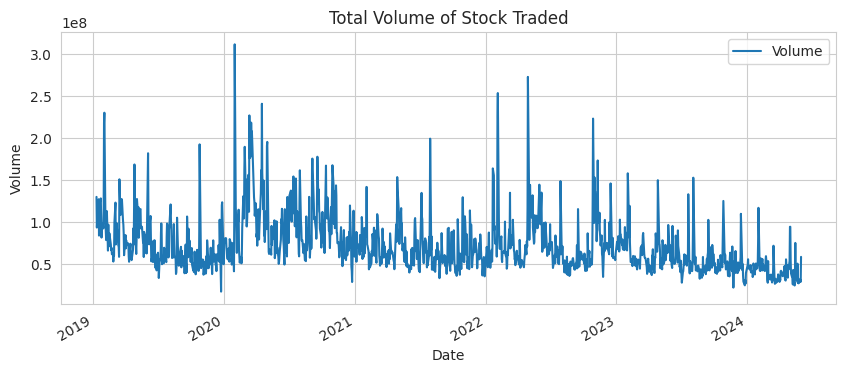

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
df['Volume'].plot(legend=True,figsize=(10,4))
plt.title('Total Volume of Stock Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
save_path = 'Total_Volume_of_Stock_Traded.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

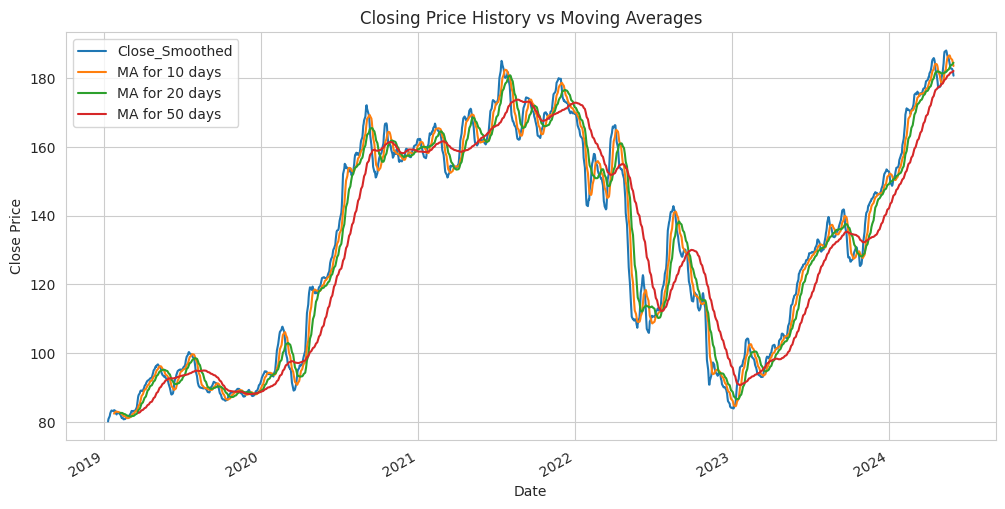

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Moving Average - MA
#A moving average (MA) is a widely used indicator in technical analysis that helps
#smooth out price action by filtering out the “noise” from random price fluctuations.
#It is a trend-following, or lagging, indicator because it is based on past prices.

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close_Smoothed'],ma).mean()

df[['Close_Smoothed','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.title('Closing Price History vs Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
save_path = 'Closing_Price_History_vs_Moving_Averages.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to find the daily returns for the Apple stock.

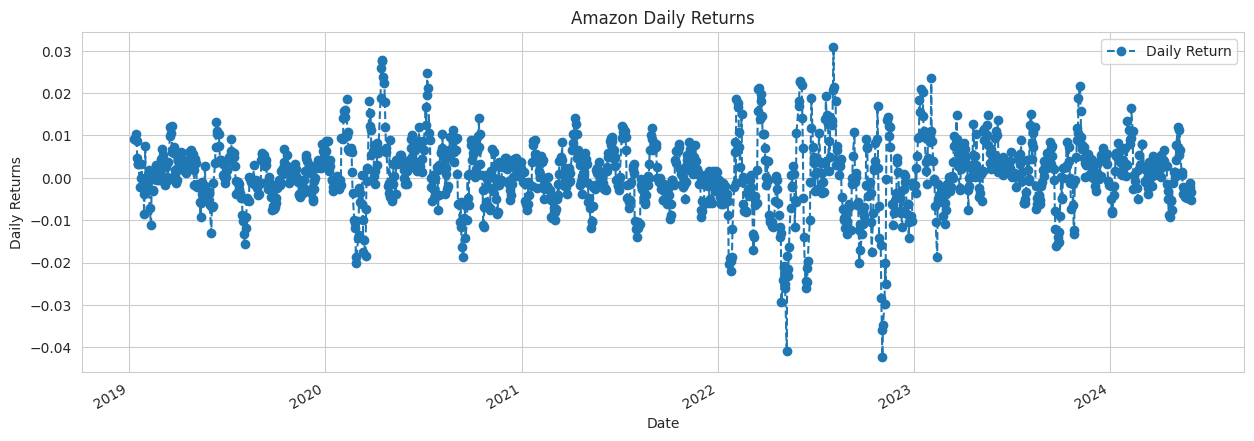

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# use pct_change to find the percent change for each day
df['Daily Return'] = df['Close_Smoothed'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(15,5),legend=True,linestyle='--',marker='o')
plt.title('Amazon Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
save_path = 'Amazon_Daily_Returns.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

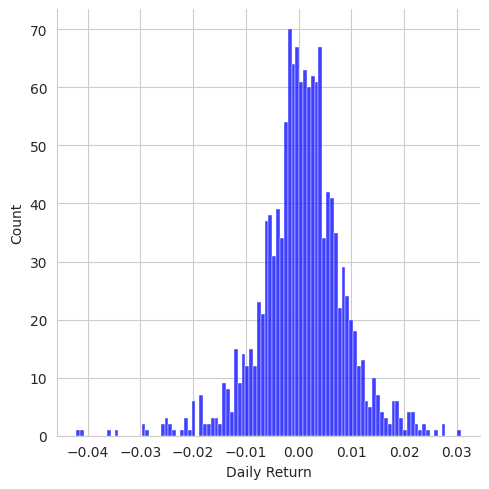

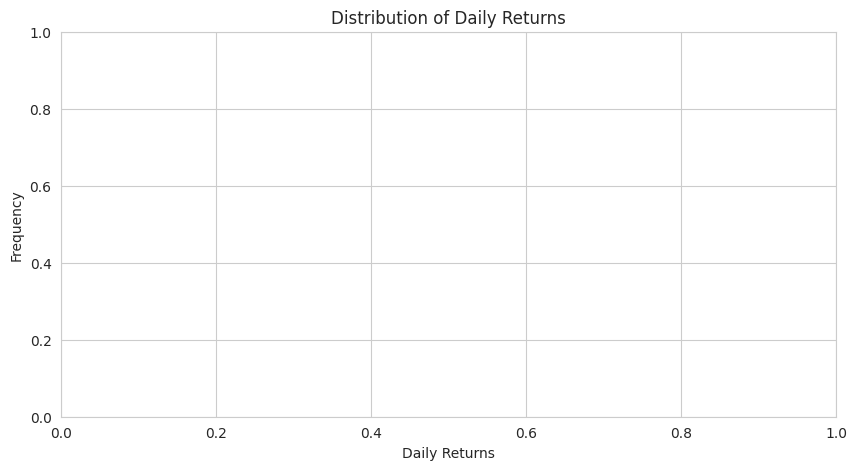

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Now let's get an overall look at the average daily return using a histogram.
#We'll use seaborn to create both a histogram and kde plot on the same figure.

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(df['Daily Return'].dropna(),bins=100,color='blue')
plt.figure(figsize=(10,5))
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
save_path = 'Distribution_of_Daily_Returns.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

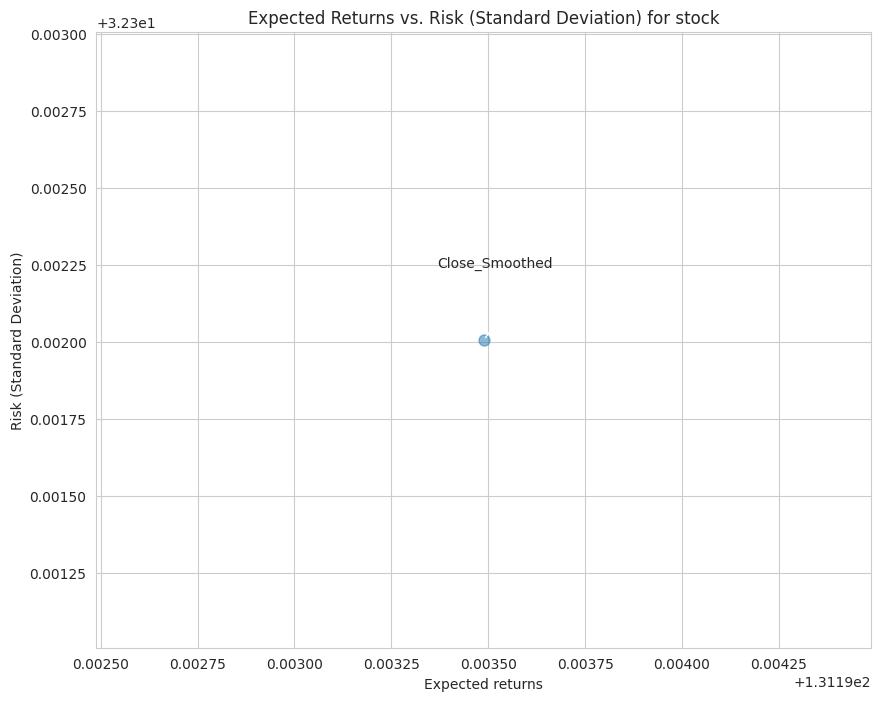

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
stock = df

# Drop rows with missing values for the selected stock
rets = df[['Close_Smoothed']].dropna()

# Calculate mean (expected return) and standard deviation (risk) of returns
mean_return = rets.mean()
std_return = rets.std()

area = np.pi * 20

plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference

plt.scatter(mean_return, std_return, alpha=0.5, s=area)

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk (Standard Deviation)')

# Set the x and y limits of the plot
plt.ylim([std_return.min() - 0.001, std_return.max() + 0.001])
plt.xlim([mean_return.min() - 0.001, mean_return.max() + 0.001])

# Label the scatter plots
for label, x, y in zip(rets.columns, mean_return, std_return):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

plt.title(f'Expected Returns vs. Risk (Standard Deviation) for stock')
plt.grid(True)
save_path = 'Expected_Returns_vs_Risk_Standard_Deviation_for_stock.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)


Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

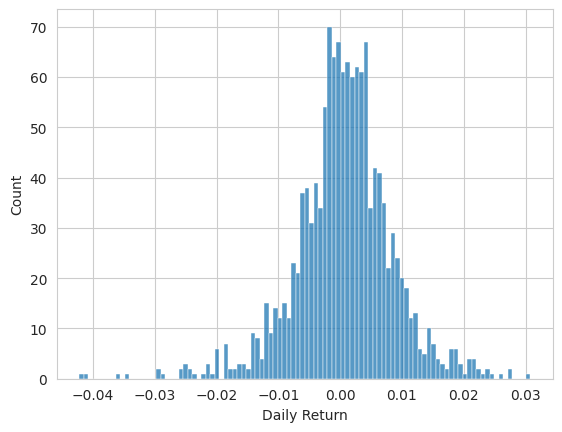

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(df['Daily Return'].dropna(), bins=100)
plt.show()

In [ ]:
rets.head()

,Close_Smoothed
Date,
2019-01-10,80.118071
2019-01-11,80.842572
2019-01-14,81.677786
2019-01-15,82.386142
2019-01-16,82.773785


In [ ]:
# The 0.05 empirical quantile of daily returns
emp = rets['Close_Smoothed'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at 86.83272751428571


Specifically, if we assume these daily returns follow a normal distribution (which may or may not be the case, depending on the data), The 0.05 empirical quantile of daily returns at 86.83272751428571 means that 5% of the daily returns in your dataset are less than or equal to 86.83272751428571. This value is also known as the 5th percentile.

In [ ]:
from scipy import stats
df['Log_Close_Smoothed'], _ = stats.boxcox(df['Close_Smoothed'] + 1)


Descriptive Statistics:
count    1357.000000
mean      131.193488
std        32.302006
min        80.118071
25%        96.503142
50%       131.377145
75%       160.885928
max       188.011429
Name: Close_Smoothed, dtype: float64


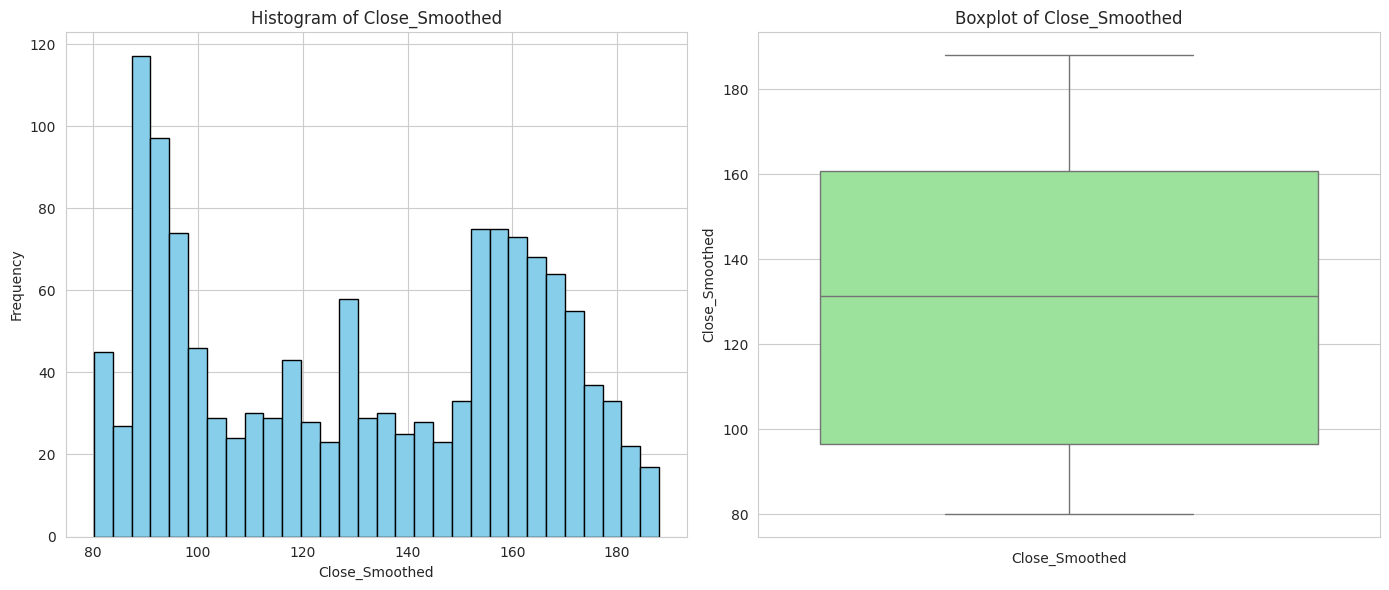

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has a column 'Close_Smoothed'

# Summary statistics
print("Descriptive Statistics:")
print(df['Close_Smoothed'].describe())

# Plotting histogram
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Close_Smoothed'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Close_Smoothed')
plt.xlabel('Close_Smoothed')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df['Close_Smoothed'].dropna(), color='lightgreen')
plt.title('Boxplot of Close_Smoothed')
plt.xlabel('Close_Smoothed')

# Show plots
plt.tight_layout()
plt.show()


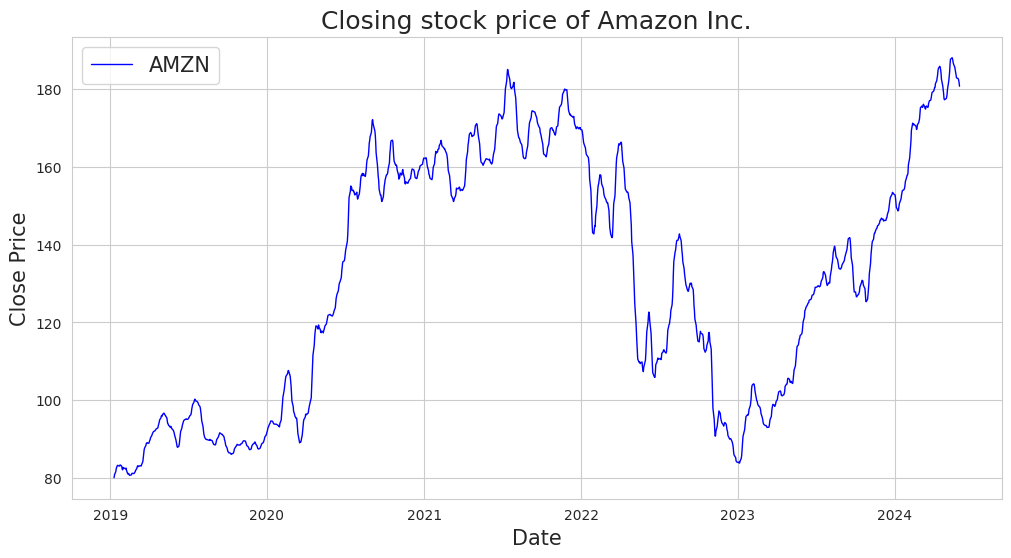

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Visualizing the closing price history

plt.figure(figsize=(12,6))
plt.plot(df['Close_Smoothed'],linewidth=1,color='blue',label='AMZN')
plt.title('Closing stock price of Amazon Inc.',fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.legend(fontsize = 15)
save_path = 'Closing_stock_price_of_Amazon_Inc.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

In [ ]:
# Use the 'Close' price for prediction
close_prices = df['Close_Smoothed'].values.reshape(-1, 1)

In [ ]:
# Scale the data to be in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
# Create dataset function
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Prepare the dataset
time_step = 60  # Number of time steps to look back
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape the data to be suitable for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Builing the RNN model

# Initialising the model
model = Sequential()

# Adding the 1st LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

# Adding the 2nd LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 3rd LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 4th LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 5th LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.5))

# Adding the 6th LSTM layer along with dropout regularization
model.add(LSTM(units=100))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Initializing the callback functions
es = EarlyStopping(monitor = 'loss', patience = 15, restore_best_weights=False)

In [ ]:
def build_and_evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=0)

    # Make predictions on the test data
    test_predict = model.predict(X_test)

    # Inverse transform the predictions to get the actual values
    test_predict = scaler.inverse_transform(test_predict)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    test_rmse = np.sqrt(np.mean((test_predict.flatten() - y_test_actual.flatten()) ** 2))

    return test_rmse

# Define a range of batch sizes to evaluate
batch_sizes = [16, 32, 64, 128]
results = {}

for batch_size in batch_sizes:
    rmse = build_and_evaluate_model(X_train, y_train, X_test, y_test, batch_size)
    results[batch_size] = rmse
    print(f'Batch size: {batch_size}, Test RMSE: {rmse}')

# Find the best batch size
best_batch_size = min(results, key=results.get)
print(f'The best batch size is: {best_batch_size} with RMSE: {results[best_batch_size]}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
Batch size: 16, Test RMSE: 2.0914728636604916


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Batch size: 32, Test RMSE: 2.999932349089474


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step
Batch size: 64, Test RMSE: 3.9481852535209847


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
Batch size: 128, Test RMSE: 6.296140524788928
The best batch size is: 16 with RMSE: 2.0914728636604916


In [ ]:
# Fitting the model to training set
model.fit(X_train,y_train,epochs=20, batch_size=32)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 282ms/step - loss: 0.3032
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - loss: 0.0401
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - loss: 0.0257
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - loss: 0.0237
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - loss: 0.0188
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - loss: 0.0171
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - loss: 0.0222
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - loss: 0.0153
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - loss: 0.0133
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - loss: 0.0150
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0143
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - loss: 0.0141
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - loss: 0.0126
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - loss: 0.0137
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/s

In [ ]:
# Make predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


In [ ]:
# Inverse transform the predictions to get the actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Calculate RMSE for training and test data
train_rmse = np.sqrt(np.mean(((train_predict - y_train_actual) ** 2)))
test_rmse = np.sqrt(np.mean(((test_predict - y_test_actual) ** 2)))

In [ ]:
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 6.192472497251133
Test RMSE: 4.854033574308458


In [ ]:
# Predict future prices
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# Predict the next 30 days
lst_output = []
n_steps = time_step
i = 0
while i < 30:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [ ]:
# Inverse transform to get actual values
future_predictions = scaler.inverse_transform(lst_output)

In [ ]:
# Display the future predictions
print(future_predictions)

[[183.30786766]
 [182.50049464]
 [181.74351451]
 [181.08904364]
 [180.56620136]
 [180.17801664]
 [179.90575615]
 [179.7179211 ]
 [179.5798487 ]
 [179.46160291]
 [179.34253396]
 [179.21208224]
 [179.06836347]
 [178.91510762]
 [178.75864915]
 [178.60525181]
 [178.45946872]
 [178.3235314 ]
 [178.19758133]
 [178.08026803]
 [177.96946927]
 [177.86308215]
 [177.75933171]
 [177.65715042]
 [177.55603024]
 [177.45602261]
 [177.35732046]
 [177.26031608]
 [177.16533745]
 [177.07258393]]


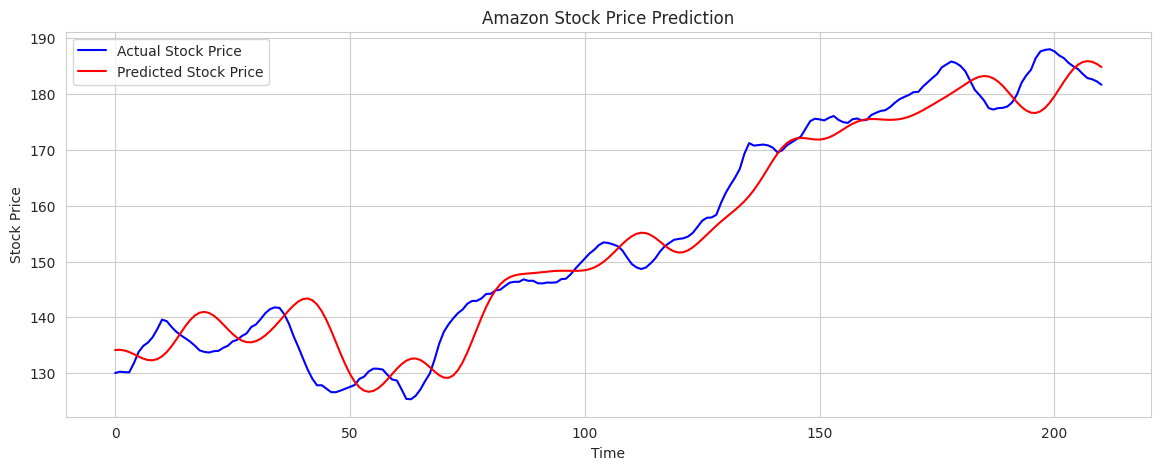

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(test_predict, color='red', label='Predicted Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

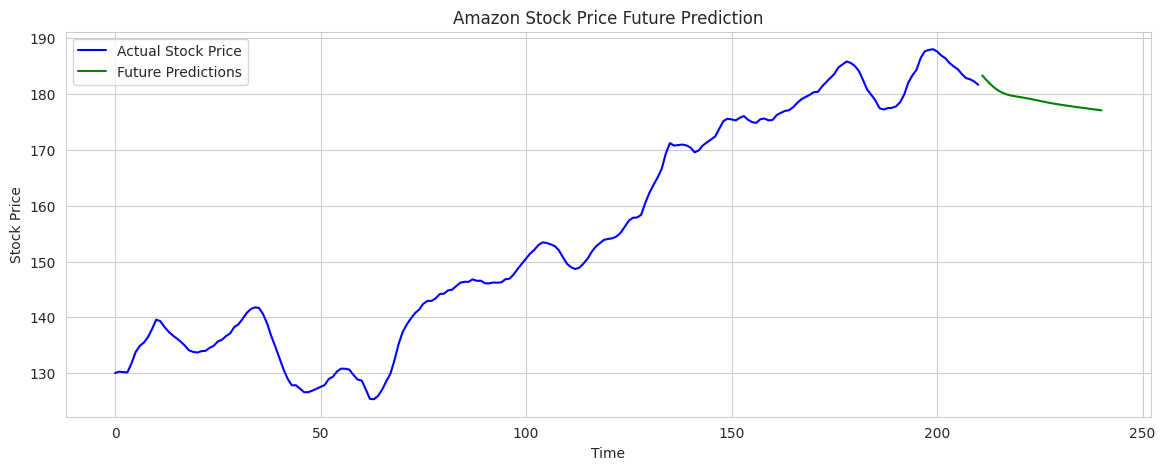

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Future predictions plot
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test_actual)), y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(range(len(y_test_actual), len(y_test_actual) + len(future_predictions)), future_predictions, color='green', label='Future Predictions')
plt.title('Amazon Stock Price Future Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
save_path = 'Amazon_Stock_Price_Future_Prediction.png'
plt.savefig(save_path)
plt.show()
files.download(save_path)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Import the missing function

# Calculate evaluation metrics for training data
train_mae = mean_absolute_error(y_train_actual, train_predict)
train_mse = mean_squared_error(y_train_actual, train_predict)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train_actual, train_predict)

# Calculate evaluation metrics for test data
# Reshape test_predict to be a 1D array
test_predict = test_predict.reshape(-1)
# Use the entire test set for evaluation, not just the first 10 samples
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_mse = mean_squared_error(y_test_actual, test_predict)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test_actual, test_predict)

# Print the results
print(f'Training MAE: {train_mae}')
print(f'Training MSE: {train_mse}')
print(f'Training RMSE: {train_rmse}')
print(f'Training MAPE: {train_mape:.2f}%')

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MAPE: {test_mape:.2f}%')

Training MAE: 4.701778490984371
Training MSE: 38.34671562921169
Training RMSE: 6.192472497251133
Training MAPE: 0.04%
Test MAE: 3.8499880230315355
Test MSE: 23.561641940513745
Test RMSE: 4.854033574308458
Test MAPE: 0.03%
